## Step 1: 

### Import Libraries  
### Read the Data Set and understand structure and find out if any null values

In [42]:
# Supress WarningsS

import warnings
warnings.filterwarnings('ignore')

In [43]:
# Import all the important libraries as required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Read the given CSV file, and view some sample records

bb = pd.read_csv("day.csv")
bb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
bb.shape

(730, 16)

In [46]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [47]:
bb.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [48]:
#Checking missing values
bb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
#from the given data we can see that instant is an index column so we drop it
bb.drop(['instant'],axis=1,inplace=True)
bb.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
#As we have yr and Month colums so to avoid confusion we can drop column dteday
bb.drop(['dteday'],axis=1,inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### categorical variables : season,yr,mnth,holiday,weekday,workingday,weathersit 
##### replacing season,weekday and weathersit with appropriate values

In [51]:
bb['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bb.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,spring,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,spring,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,spring,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,spring,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,spring,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [52]:
bb['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
bb['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [54]:
bb['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Data Visualization


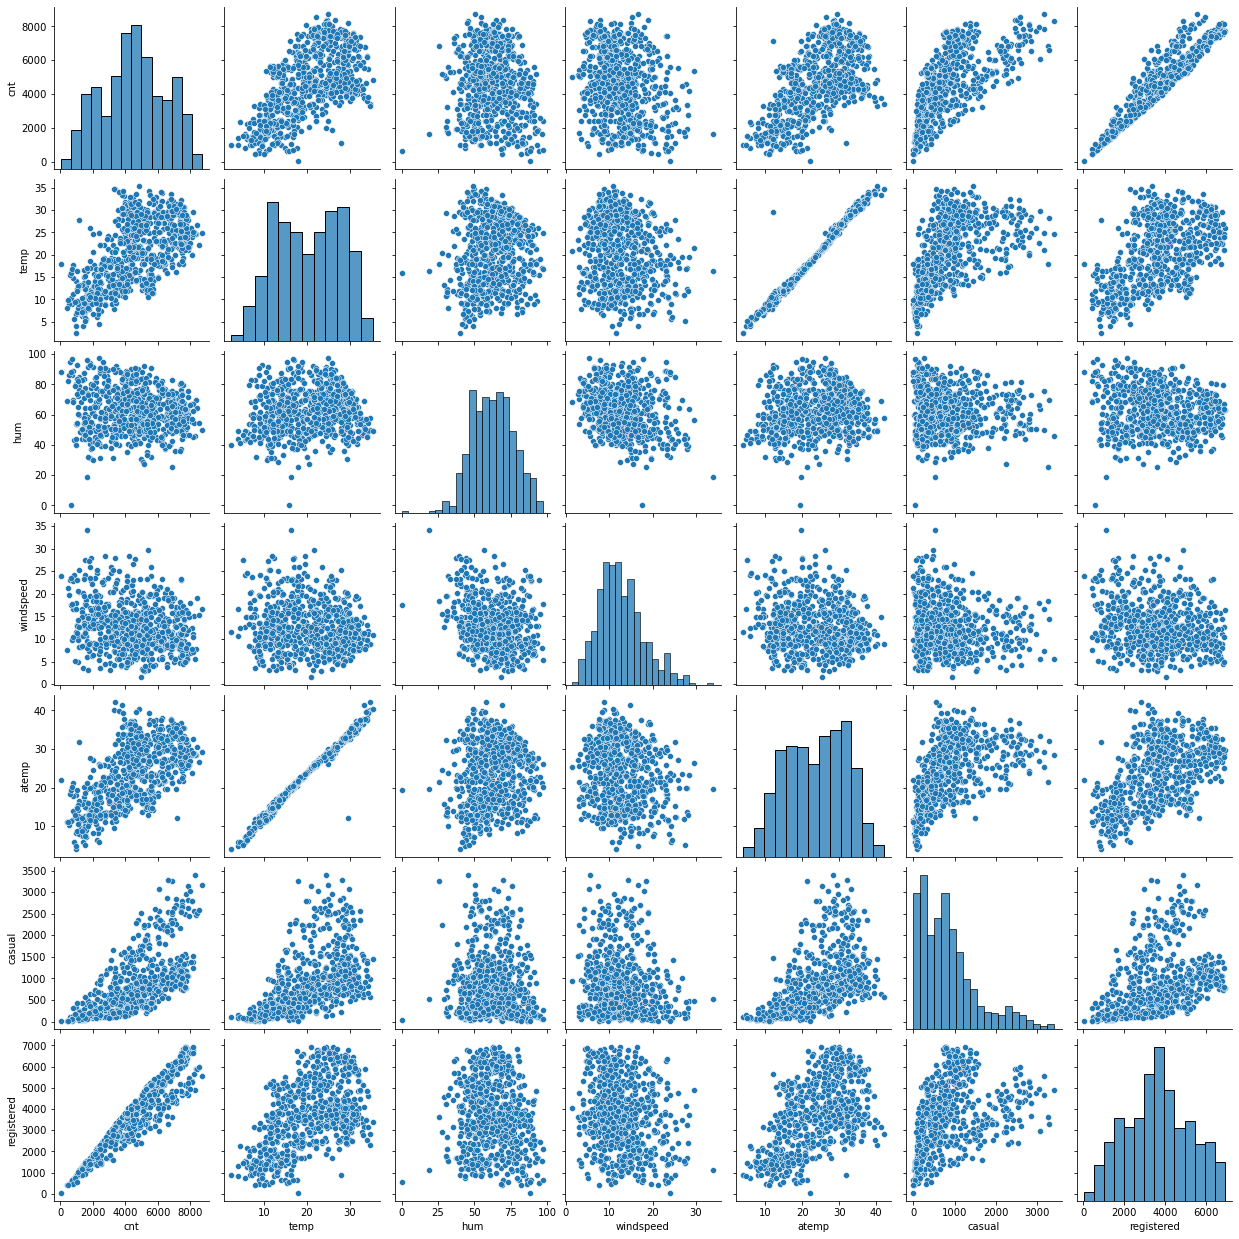

In [55]:
#Pairplot for numeric variables

sns.pairplot(bb, vars=['cnt','temp', 'hum','windspeed','atemp','casual', 'registered'])
plt.show()

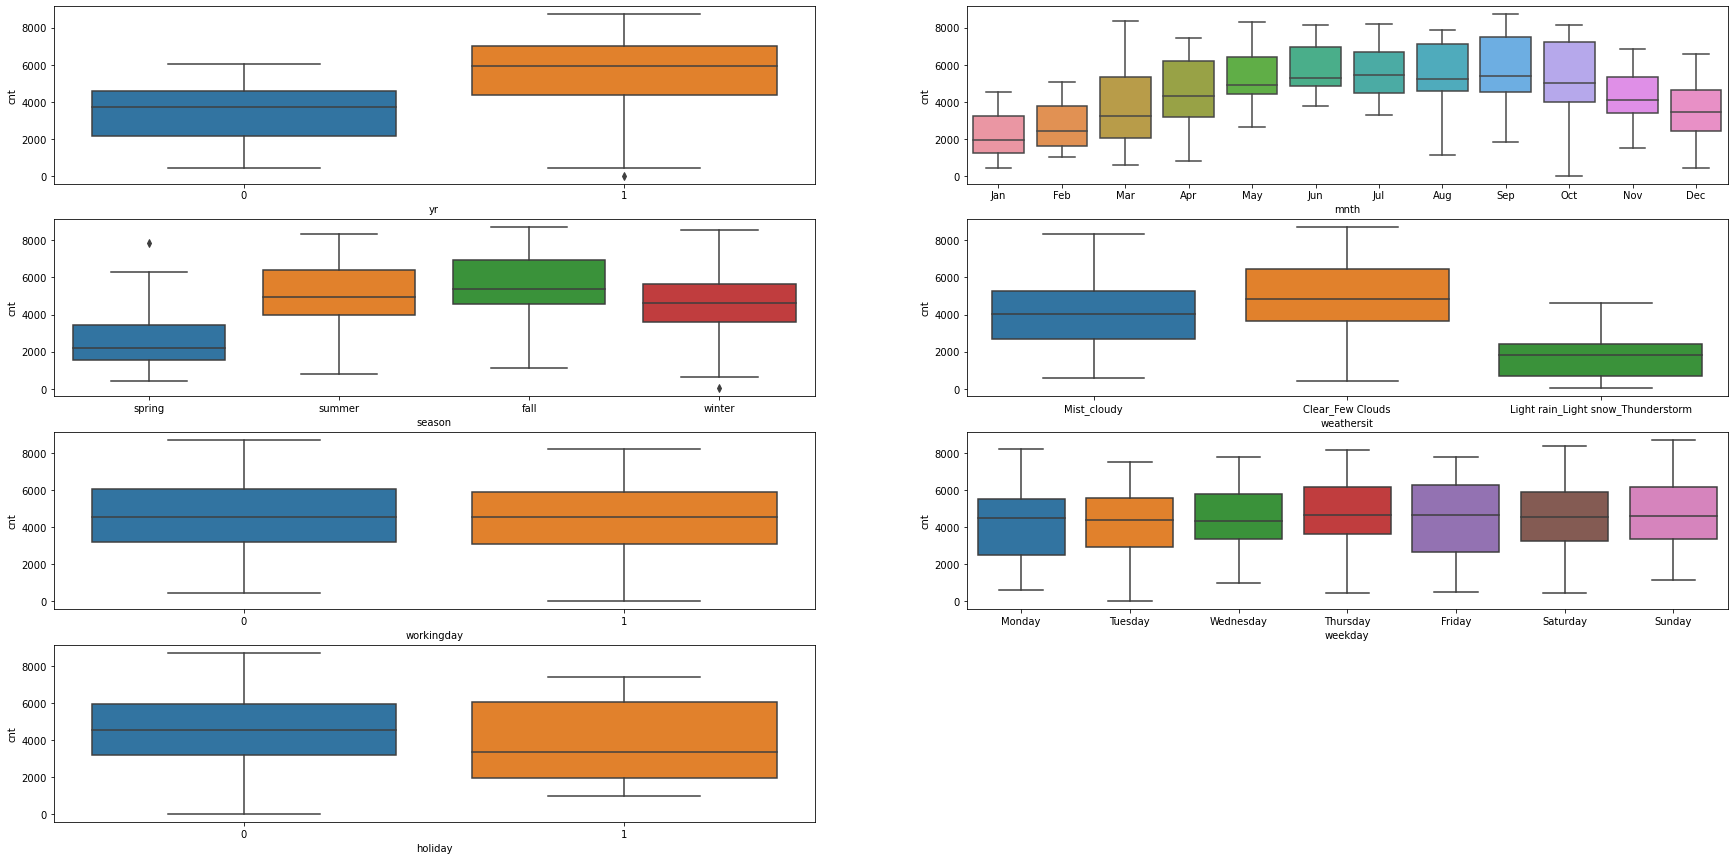

In [56]:
#visualising the categorical variables
#yr', ''season' , holiday, mnth','workingday','weathersit','weekday'

plt.figure(figsize=(30, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bb)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bb)
plt.subplot(4,2,3)
sns.boxplot(x = 'season', y = 'cnt', data = bb)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bb)
plt.subplot(4,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bb)
plt.subplot(4,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bb)
plt.subplot(4,2,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bb)
plt.show()

yr

There are more bikes rentend in 2019 as compared to 2018. This could be because of the increased popularity of the company.

mnth

Clearly Jun, Jul, Aug, Sep are the months bikes are preferred more

season

Fall has the highest rentals amongst all

weathersit

When the weather is clear there is a trend of more rentals

holiday

As bikes are more used for commute to work it seems hence the over all trend is lesser however there are chances that casuals would be using it more during holidays to move around

working day

Working day has little of higher median


weekday
Monday, Tuesday and Thursdays are more preferred to use bikes


In [57]:
#As we are focusing on over all count, removing colums of casual and registered, However can be a further study to be done 
# to ensure that how casual and registered members can be attracted more to use boombikes
bb.drop(['casual', 'registered'],axis=1,inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [58]:
bb.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


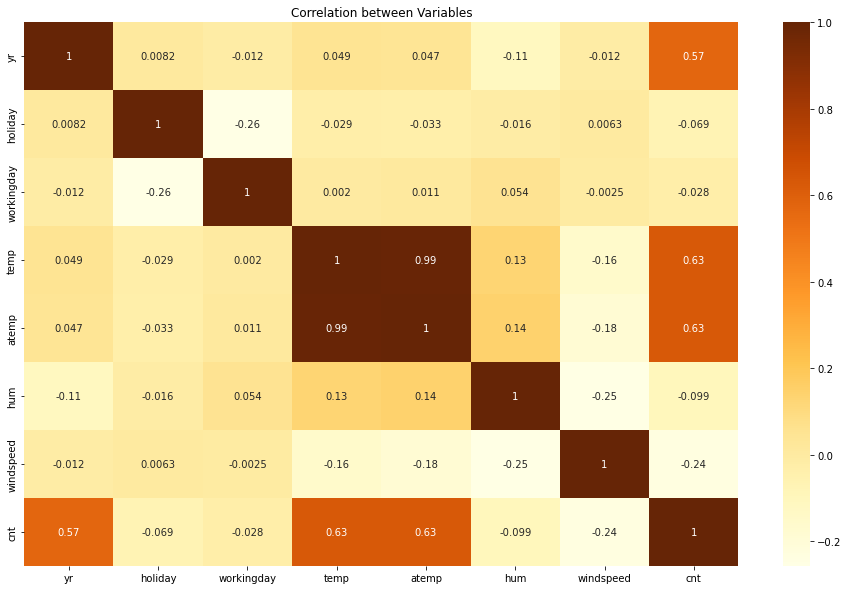

In [59]:
## Above we can see the significant correlation between temp and atemp so let's visulize the same for further action
## Also identify the correlation and course of action for further calculations

#let's check the correlation throguh heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(bb.corr(), annot = True, cmap="YlOrBr")
plt.title("Correlation between Variables")
plt.show()

In [60]:
## we can drop the temp column as it has almost simmilar correlation with other variables

bb.drop(['temp'],axis=1,inplace=True)
bb.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


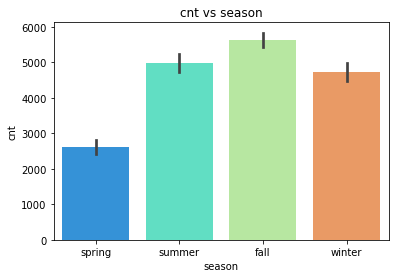

In [61]:
#checking cnt against season for the success season as per the data
sns.barplot('season','cnt',data=bb ,palette="rainbow",)
plt.title("cnt vs season")
plt.show()

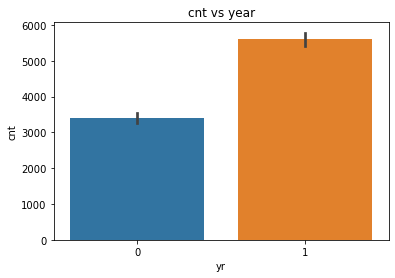

In [62]:
#checking cnt against year 2018 and 2019 for the progress as per the data
sns.barplot('yr','cnt',data=bb)
plt.title("cnt vs year")
plt.show()

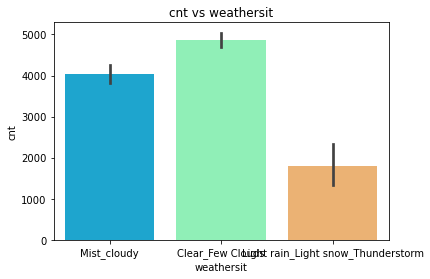

In [63]:
#checking cnt against weathersit
sns.barplot('weathersit','cnt',data=bb, palette="rainbow")
plt.title("cnt vs weathersit")
plt.show()

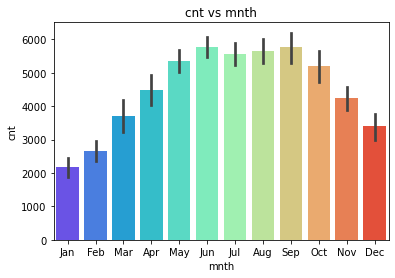

In [64]:
#checking cnt against season for the success season as per the data
sns.barplot('mnth','cnt',data=bb ,palette="rainbow",)
plt.title("cnt vs mnth")
plt.show()

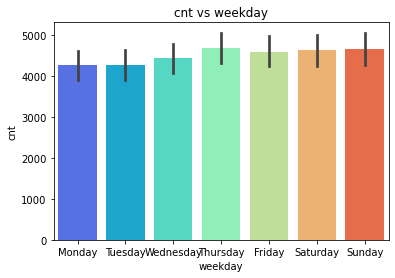

In [65]:
#checking cnt against season for the success season as per the data
sns.barplot('weekday','cnt',data=bb ,palette="rainbow",)
plt.title("cnt vs weekday")
plt.show()

### Step 1: Preparing Data for Modelling

##### - Category vars to dummy vars 

In [66]:
## creating dummy variables for mnth, season, weathersit, weekday 
## Let's drop the first column from  using 'drop_first = True'pd.get_dummies(bb.season,drop_first=True)
weekdays=pd.get_dummies(bb.weekday,drop_first=True)
months=pd.get_dummies(bb.mnth,drop_first=True)
weather_condition=pd.get_dummies(bb.weathersit,drop_first=True)
seasons=pd.get_dummies(bb.season,drop_first=True)

#bb=pd.concat([seasons,bike], axis=1)

In [67]:
bb=pd.concat([bb,weekdays],axis=1)
bb=pd.concat([bb,seasons],axis=1)
bb=pd.concat([bb,weather_condition],axis=1)
bb=pd.concat([bb,months],axis=1)
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  Monday                              730 non-n

In [68]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bb.drop(['season'],axis=1,inplace=True)
bb.drop(['weathersit'],axis=1,inplace=True)
bb.drop(['weekday'],axis=1,inplace=True)
bb.drop(['mnth'],axis=1,inplace=True)
bb.head()


,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
bb.shape

(730, 29)

  #### Splitting in to Train and Test  

In [70]:
bb_train, bb_test = train_test_split(bb, train_size = 0.7, random_state = 100)
print (bb_train.shape)
print (bb_test.shape)

(510, 29)
(220, 29)


### Step 2: Rescalling of Variables

#### Min Max Scalling
#### Standardisation (mean - 0, sigme - 1)

In [71]:
#x
#normalization: (x-xmin)/ (xmax- xmin)
#standardisation: (x-mu)/sigma

# Using Min Max scalling here

In [72]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['cnt','atemp','hum','windspeed']

#Fit on data
#scaler.fit
bb_train[num_vars] = scaler.fit_transform(bb_train[num_vars])
bb_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Checking numeric variables(min and max) after scaling
bb_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.513156,0.650480,0.320883,0.513499,0.154902,0.129412,0.137255,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.453386,0.212410,0.145846,0.169803,0.224421,0.362166,0.335985,0.344454,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 3: Training the Model

- fit() - train
- transform () - test
- fit_transform()

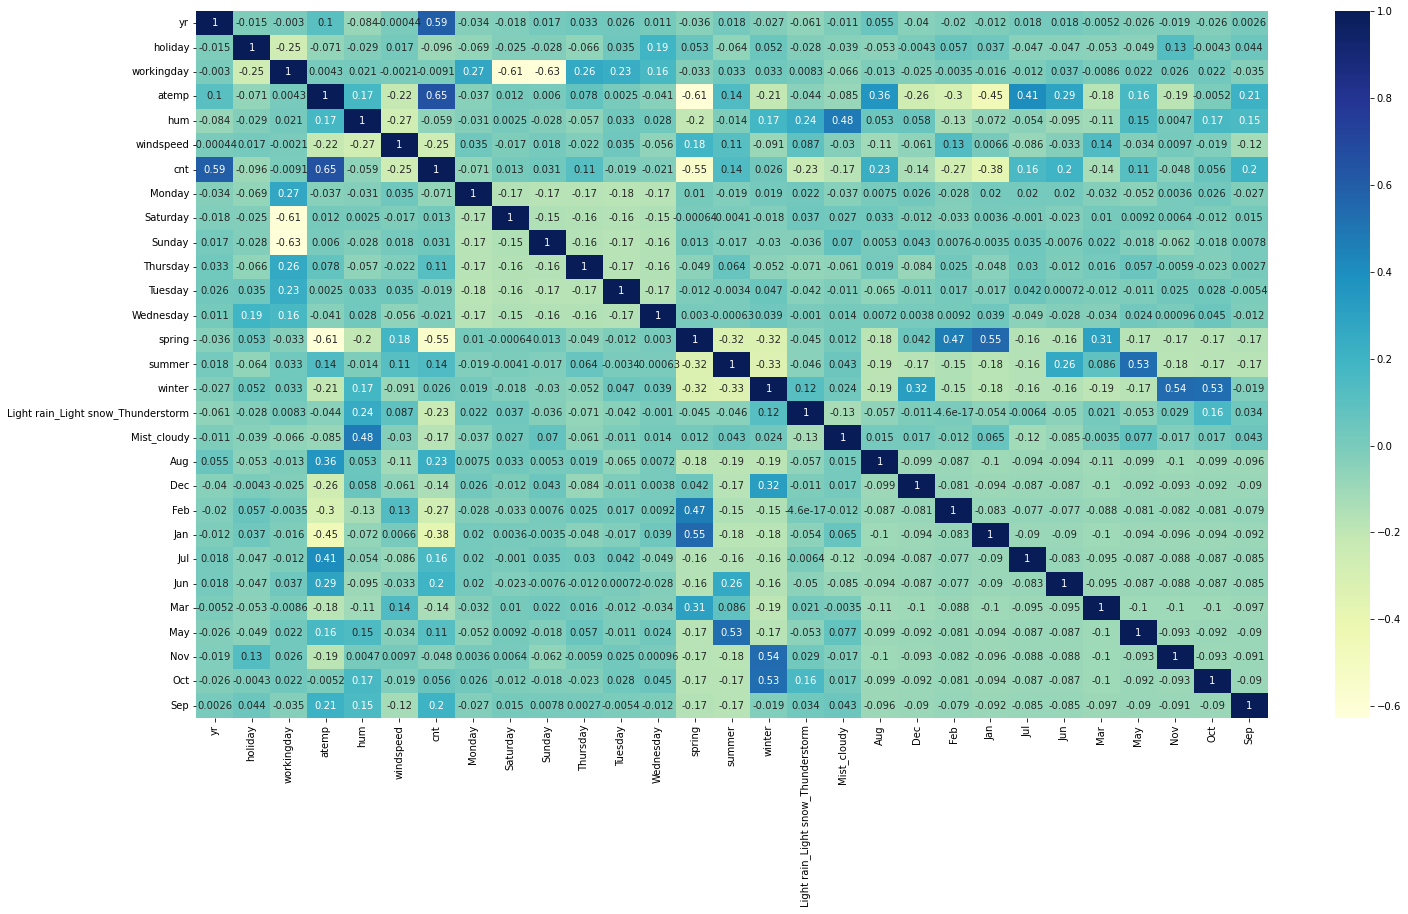

In [74]:
# Heatmap
plt.figure(figsize = (24,13))
sns.heatmap(bb_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

In [75]:
# x_train, y_train
y_train = bb_train.pop('cnt')
x_train = bb_train

In [76]:
# add a constant 
x_train_sm = sm.add_constant(x_train['atemp'])

#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.162201
atemp    0.684584
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           4.77e-62
Time:                        13:09:37   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.000       0.123       0.201
atemp          0.6846      0.036     19.173      0.000       0.614       0.755
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# add another variable
x_train_sm = x_train[['atemp', 'yr']]
x_train_sm = sm.add_constant(x_train_sm)

#create second model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

#summary
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          3.98e-132
Time:                        13:09:37   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.000       0.042       0.101
atemp          0.6259      0.026     24.092      0.000       0.575       0.677
yr             0.2373      0.011     21.524      0.000       0.216       0.259
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# add one more variable
x_train_sm = x_train[['atemp', 'yr', 'Sep']]
x_train_sm = sm.add_constant(x_train_sm)

#create third model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     399.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          4.91e-133
Time:                        13:09:37   Log-Likelihood:                 348.70
No. Observations:                 510   AIC:                            -689.4
Df Residuals:                     506   BIC:                            -672.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.015      5.069      0.000       0.046       0.104
atemp          0.6079      0.026     23.118      0.000       0.556       0.660
yr             0.2381      0.011     21.794      0.000       0.217       0.260
Sep            0.0675      0.020      3.305      0.001       0.027       0.108
==============================================================================
Omnibus:                       42.237   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.403
Skew:                          -0.588   Prob(JB):                     1.04e-14
Kurtosis:                       4.284   Cond. No.                         6.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# add one more variable
x_train_sm = x_train[['atemp', 'yr', 'Sep', 'summer']]
x_train_sm = sm.add_constant(x_train_sm)

#create fourth model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     305.9
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          2.07e-133
Time:                        13:09:37   Log-Likelihood:                 352.69
No. Observations:                 510   AIC:                            -695.4
Df Residuals:                     505   BIC:                            -674.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.876      0.000       0.043       0.101
atemp          0.5947      0.027     22.411      0.000       0.543       0.647
yr             0.2381      0.011     21.944      0.000       0.217       0.259
Sep            0.0794      0.021      3.833      0.000       0.039       0.120
summer         0.0364      0.013      2.822      0.005       0.011       0.062
==============================================================================
Omnibus:                       42.428   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.113
Skew:                          -0.566   Prob(JB):                     9.83e-16
Kurtosis:                       4.404   Cond. No.                         7.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adding all the variables to the Model

In [81]:
bb.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'spring', 'summer', 'winter', 'Light rain_Light snow_Thunderstorm',
       'Mist_cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [82]:
## build a model with all variables
x_train_sm = sm.add_constant(x_train)

#create a model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.81
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          4.50e-177
Time:                        13:09:39   Log-Likelihood:                 519.23
No. Observations:                 510   AIC:                            -980.5
Df Residuals:                     481   BIC:                            -857.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4145      0.085      4.857      0.000       0.247       0.582
yr                                     0.2330      0.008     28.480      0.000       0.217       0.249
holiday                               -0.1337      0.066     -2.028      0.043      -0.263      -0.004
workingday                            -0.0657      0.072     -0.918      0.359      -0.207       0.075
atemp                                  0.4104      0.046      8.958      0.000       0.320       0.500
hum                                   -0.1519      0.039     -3.878      0.000      -0.229      -0.075
windspeed                             -0.1649      0.026     -6.279      0.000      -0.216      -0.113
Monday                                -0.0258      0.015     -1.756      0.080      -0.055       0.003
Saturday                              -0.0580      0.072     -0.804      0.422      -0.200       0.084
Sunday                                -0.0552      0.072     -0.766      0.444      -0.197       0.086
Thursday                               0.0042      0.015      0.276      0.783      -0.025       0.034
Tuesday                               -0.0269      0.015     -1.814      0.070      -0.056       0.002
Wednesday                             -0.0111      0.015     -0.719      0.473      -0.041       0.019
spring                                -0.0474      0.030     -1.560      0.120      -0.107       0.012
summer                                 0.0382      0.026      1.443      0.150      -0.014       0.090
winter                                 0.1067      0.028      3.761      0.000       0.051       0.162
Light rain_Light snow_Thunderstorm    -0.2478      0.027     -9.211      0.000      -0.301      -0.195
Mist_cloudy                           -0.0594      0.011     -5.608      0.000      -0.080      -0.039
Aug                                    0.0487      0.034      1.448      0.148      -0.017       0.115
Dec                                   -0.0530      0.034     -1.558      0.120      -0.120       0.014
Feb                                   -0.0454      0.033     -1.359      0.175      -0.111       0.020
Jan                                   -0.0748      0.034     -2.206      0.028      -0.141      -0.008
Jul                                   -0.0092      0.035     -0.263      0.793      -0.078       0.060
Jun                                    0.0281      0.024      1.146      0.252      -0.020       0.076
Mar                                   -0.0011      0.025     -0.045      0.964      -0.050       0.048
May                                    0.0364      0.021      1.724      0.085      -0.005       0.078
Nov                                   -0.0457      0.037     -1.237      0.217      -0.118      

In [83]:
# significance (p-values)
#VIF

### VIF 

#### VIF = 1/(1-R^2)

- 5 = 1/(1-R^2)
- 1-R^2 = 0.2
- R^2 = 0.8  Means 80% of variance is explained by other variables.. Any VIF above 5 is very high..

In [84]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values (by = 'VIF', ascending = False)
vif

,Features,VIF
2,workingday,63.13
4,hum,40.96
3,atemp,37.89
12,spring,13.47
14,winter,12.38
8,Sunday,12.19
7,Saturday,11.61
13,summer,9.82
25,Nov,7.14
26,Oct,6.82


We could have:
- High p-value, High VIF
- High - Low:
     - High p, Low VIF -- Remove these First
     - Low p, High VIF -- Remove these after the ones above
- Low p, Low VIF

In [85]:
X = x_train.drop('workingday', axis = 1)

In [86]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.36
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          6.77e-178
Time:                        13:09:42   Log-Likelihood:                 518.78
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     482   BIC:                            -863.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [87]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,37.23
2,atemp,32.37
11,spring,11.87
13,winter,11.73
12,summer,7.06
25,Oct,6.30
24,Nov,6.07
16,Aug,5.47
19,Jan,5.20
4,windspeed,4.97


In [88]:
X =X.drop('Jan', axis = 1)

In [89]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          7.17e-178
Time:                        13:09:44   Log-Likelihood:                 516.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     483   BIC:                            -864.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [90]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.69
2,atemp,30.49
13,winter,10.26
11,spring,7.06
12,summer,7.06
16,Aug,5.43
24,Oct,5.11
4,windspeed,4.96
19,Jul,4.96
23,Nov,4.78


In [91]:
X = X.drop('hum', 1)

In [92]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     102.1
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          3.46e-175
Time:                        13:09:46   Log-Likelihood:                 507.18
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     484   BIC:                            -852.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [94]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.44
12,winter,9.39
11,summer,5.79
15,Aug,5.14
23,Oct,5.00
3,windspeed,4.87
18,Jul,4.85
22,Nov,4.62
10,spring,4.58
24,Sep,3.65


In [95]:
X = X.drop('Nov', 1)

In [96]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [97]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     106.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          3.41e-176
Time:                        13:09:47   Log-Likelihood:                 507.15
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     485   BIC:                            -858.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [98]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,21.76
11,summer,5.47
12,winter,4.77
3,windspeed,4.76
15,Aug,4.71
10,spring,4.56
18,Jul,4.45
23,Sep,2.97
19,Jun,2.55
21,May,2.20


In [99]:
X = X.drop('Mar', 1)

# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     109.6
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          9.24e-176
Time:                        13:09:48   Log-Likelihood:                 503.59
No. Observations:                 510   AIC:                            -959.2
Df Residuals:                     486   BIC:                            -857.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [100]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,20.66
11,summer,5.43
3,windspeed,4.75
12,winter,4.75
15,Aug,4.53
10,spring,4.31
18,Jul,4.28
22,Sep,2.87
19,Jun,2.35
0,yr,2.09


In [101]:
X = X.drop('Oct', 1)

# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     113.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          5.60e-176
Time:                        13:09:49   Log-Likelihood:                 501.60
No. Observations:                 510   AIC:                            -957.2
Df Residuals:                     487   BIC:                            -859.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [102]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,18.88
11,summer,5.19
3,windspeed,4.75
12,winter,4.52
10,spring,4.23
15,Aug,4.20
18,Jul,3.96
21,Sep,2.58
19,Jun,2.25
0,yr,2.09


In [103]:
X = X.drop('Wednesday', 1)

# Build a eighth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     119.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          5.68e-177
Time:                        13:09:50   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     488   BIC:                            -865.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [104]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,18.62
10,summer,4.91
3,windspeed,4.75
11,winter,4.17
14,Aug,4.11
17,Jul,3.90
9,spring,3.85
20,Sep,2.55
18,Jun,2.25
0,yr,2.08


In [105]:
X = X.drop('Thursday', 1)

# Build a ninth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

print(lr_9.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          6.77e-178
Time:                        13:09:51   Log-Likelihood:                 501.16
No. Observations:                 510   AIC:                            -960.3
Df Residuals:                     489   BIC:                            -871.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [106]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,18.27
9,summer,4.82
3,windspeed,4.73
10,winter,4.10
13,Aug,4.10
16,Jul,3.88
8,spring,3.77
19,Sep,2.55
17,Jun,2.24
0,yr,2.08


In [107]:
X = X.drop('Sunday', 1)

# Build a Tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

print(lr_10.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     131.8
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          1.19e-178
Time:                        13:09:52   Log-Likelihood:                 500.40
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     490   BIC:                            -876.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [108]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,18.23
8,summer,4.80
3,windspeed,4.71
12,Aug,4.10
9,winter,4.08
15,Jul,3.87
7,spring,3.73
18,Sep,2.54
16,Jun,2.24
0,yr,2.08


In [109]:
X = X.drop('Saturday', 1)

# Build a Eleventh fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

print(lr_11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          1.17e-179
Time:                        13:09:53   Log-Likelihood:                 500.23
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     491   BIC:                            -882.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [110]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,18.20
7,summer,4.77
3,windspeed,4.71
11,Aug,4.08
8,winter,4.05
14,Jul,3.86
6,spring,3.67
17,Sep,2.53
15,Jun,2.24
0,yr,2.08


In [111]:
X = X.drop('Jul', 1)

# Build a Twelveth fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

print(lr_12.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          1.05e-180
Time:                        13:09:54   Log-Likelihood:                 500.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     492   BIC:                            -888.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [112]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,6.20
3,windspeed,4.69
7,summer,3.07
6,spring,2.64
8,winter,2.24
0,yr,2.08
11,Aug,1.83
15,May,1.78
10,Mist_cloudy,1.59
14,Jun,1.52


In [113]:
X = X.drop('Feb', 1)

# Build a Thirteenth fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

print(lr_13.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          8.21e-182
Time:                        13:09:57   Log-Likelihood:                 500.13
No. Observations:                 510   AIC:                            -966.3
Df Residuals:                     493   BIC:                            -894.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [114]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,atemp,6.19
3,windspeed,4.67
7,summer,3.07
6,spring,2.26
8,winter,2.24
0,yr,2.08
11,Aug,1.83
14,May,1.78
10,Mist_cloudy,1.59
13,Jun,1.52


### Step 4: Residual Analysis

In [115]:
y_train_pred = lr_13.predict(X_train_lm)

<AxesSubplot:ylabel='Density'>

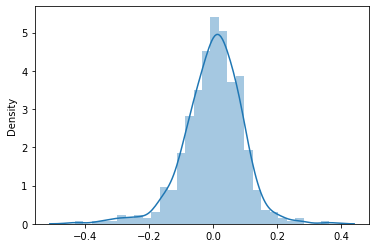

In [116]:
res = y_train - y_train_pred
sns.distplot(res)

### Prediction and Evaluation on the Test Set

In [117]:
#Create a list of numeric variables
num_vars=['cnt','atemp','hum','windspeed']

#Fit on data
#scaler.fit
bb_test[num_vars] = scaler.transform(bb_test[num_vars])
bb_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [118]:
bb_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.532847,0.638221,0.313293,0.522154,0.118182,0.172727,0.154545,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.480828,0.217401,0.148694,0.159584,0.219163,0.323559,0.378873,0.362295,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
y_test = bb_test.pop('cnt')
X_test = bb_test

In [120]:
# add a constant to make predictions
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,Monday,Saturday,Sunday,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,0,0.496145,0.837699,0.334206,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
X_test_sm = X_test_sm.drop(['Oct','Wednesday','Thursday','Sunday','Saturday','Jul', 'Feb','Mar','workingday','Jan', 'hum','Nov',], axis =1 )

In [122]:
# predict
y_test_pred = lr_13.predict(X_test_sm)

### Finding r2_score

In [123]:
# evaluate
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8141316248945166

Text(0, 0.5, 'y_pred')

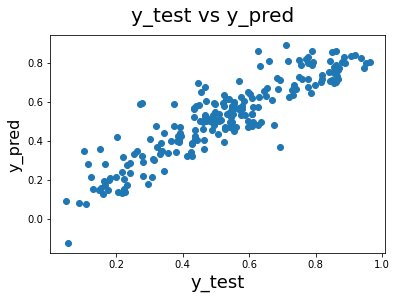

In [124]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### Model Evaluation

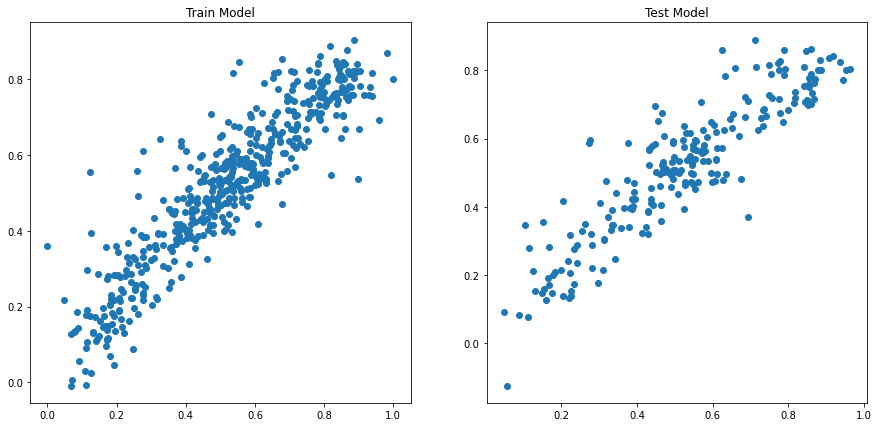

In [154]:
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
plt.scatter(y_train, y_train_pred)
plt.title("Train Model")

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred)
plt.title("Test Model")

plt.show()

### The Equation for our best Fitted Line

cnt = 0.4465 X atemp + 0.1062 X Sep + 0.2352 X yr + 0.0975 X winter + 0.0555 X summer + 0.0522 X Aug + 0.0205 X May + 0.0268 X         Jun - 0.1242 X windspeed - 0.0949 X holiday - 0.0285 X Monday - 0.0322 X Tuesday - 0.0618 X spring - 0.0234 X Dec - 0.0828       X Mist_cloudy - 0.2826 X Light Rain_Light snow_ Thunderstorm

Overall, this is a decent model with R - Squared as 0.836 and adjusted R - Squared as 0.831.

r2_score(y_true = y_test, y_pred = y_test_pred)  = 0.8141316248945166

- Variables to to keep a check with this business:

1. aTemp
2. September Month
3. Light Rain_Light Snow_ Thunderstrom Situations
4. June Month
